# 의사결정나무(Decision Tree )

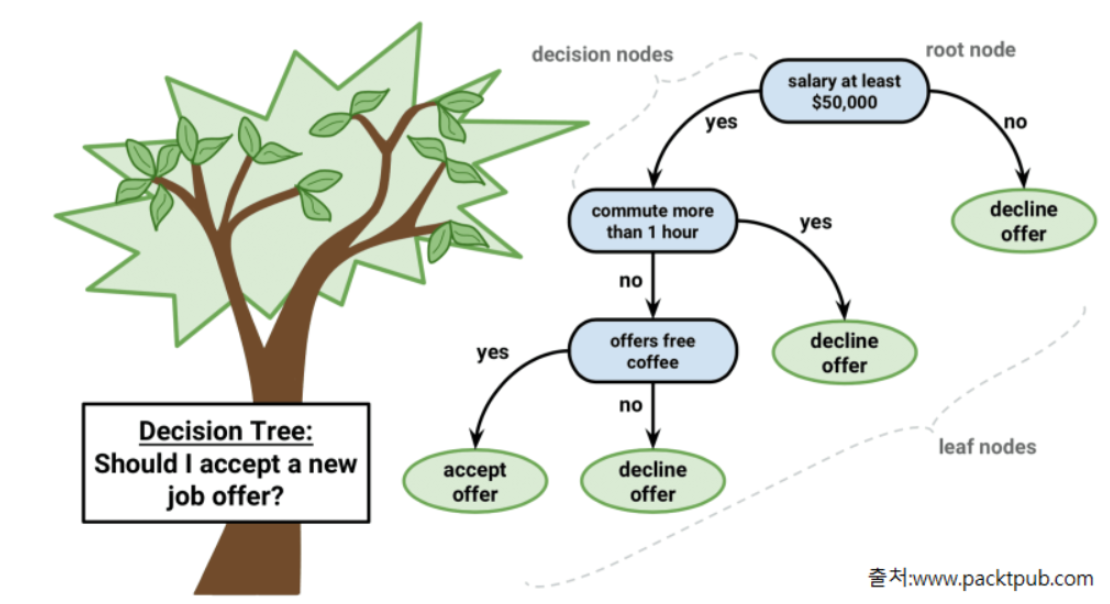

## 개요

- 데이터를 잘 분류할 수 있는 질문을 던져 가며 대상을 좁혀가는 '스무고개'와 비슷한 형식의 알고리즘.
- 추론결과을 위해 분기해 나가는 구조가 Tree 구조와 같기 때문에 Decision Tree 라고 한다.
    - 노드안의 원소들의 불순도 최대한 감소하는 방향(최대한 한 class의 값들만 있는 상태)으로 조건을 만들어 학습을 진행한다.
    - 하위노드는 yes/no 두 개로 분기 된다.
    - **분기 기준**
        - **분류:** 가장 불순도를 낮출수 있는 조건을 찾아 분기한다.
        - **회귀:** 가장 오차가 적은 조건을 찾아 분기 한다. 
- 머신러닝 모델들 중 몇 안되는 White box 모델로 추론 결과에 대한 해석이 가능하다.
- 과대적합(Overfitting)이 발생하기 쉽다.
- 앙상블기반 알고리즘인 랜덤 포레스트와 많은 부스팅(Boosting)기반 앙상블 모델들의 기반 알고리즘으로 사용된다.
    - decision tree가 최종 모델로는 사용되지는 않지만 기반 알고리즘이다

> **순도(purity)/불순도(impurity)**
>    - 서로 다른 종류의 값들이 섞여 있는 비율
>    - 한 종류(class)의 값이 많을 수록 순도가 높고 불순도는 낮다.

## 용어
- Root Node : 시작 node
- Decision Node (Intermediate Node): 중간 node
- Leaf Node(Terminal Node) : 마지막 단계(트리의 끝)에 있는 노드로 최종결과를 가진다.

## 과대적합(Overfitting) 문제
- 모든 데이터셋이 모두 잘 분류 되어 불순도가 0이 될때 까지 분기해 나간다.
- Root에서 부터 하위 노드가 많이 만들어 질 수록 모델이 복잡해져 과대적합이 발생할 수 있다.
- 과대적합을 막기 위해서는 적당한 시점에 하위노드가 더이상 생성되지 않도록 해야 한다.
    - 하위 노드가 더이상 생성되지 않도록 하는 것을 **가지치기(Pruning)** 라고 한다.
    

## 하이퍼파라미터

- **max_depth** 
    - 트리의 최대 깊이(질문 단계)를 정의
    - 기본값: None - 깊이 제한 없이 완벽히 분할 될때 까지 분기한다.
        - 분류: 불순도가 0이 될때 까지, 회귀: MSE가 0이 될 때 까지
- **max_leaf_nodes**
    - Leaf Node 개수 제한한다. 
    - 기본값: None - 제한없다.
    - ex) max_leaf_nodes=10 -> 전체 Tree의 leaf node가 최대 10개를 넘을 수 없다.
- **min_samples_leaf**
    - Leaf Node가 가져야 하는 최소한의 sample (데이터) 수를 지정한다.
    - 개수를 지정할 수 도있고(정수), 전체 샘플대비 비율로 지정(0.0 ~ 0.5 실수)할 수 있다.
        - ex: min_sample_leaf=5 -> 모든 leaf node는 최소한 5개 데이터를 가져야한다. 그래서 5개가 되면 더이상 분기하지 않는다.
    - 기본값: 1 -> 제한이 없다. 
- **max_features**
    - 분기 할 때마다 지정한 개수의 Feature(특성)만 사용한다.
    - 다음 값 중 선택한다.
        - None(기본값): 전체 Feature를 다 사용한다.
        - 정수: 개수를 지정한다.
        - 0 ~ 1 사이 실수: 전체 개수 대비 비율
        - "sqrt": 전체 특성개수의 제곱근 개수만큼만 사용한다.
        - "log2": $\log _{2} {Feature개수}$ 만큼만 사용한다.
        - Feature 가 25개일 경우 
            - 'sqrt' 는 $\sqrt{25}=5$ 이므로 5개 Feature를 사용
            - 'log2' 는 $\log_{2} 25=4.64$ 이므로 5개 특성 사용
- **min_samples_split**
    - 분할 하기 위해서 필요한 최소 샘플 수를 정의. 정의한 개수보다 더 적은 샘플을 가진 노드는 더이상 분기 되지 않는다.
    - 기본값: 2
    - ex) min_samples_split=10 -> sample 수가 10 미만인 노드는 더이상 분기되지 않는다.
- **criterion**
    - 각 노드의 불순도 계산 방식을 정의한다.
    - 분류
        - "gini"(기본값), "entropy"
    - 회귀
        - "squared_error"(기본값), "absolute_error", "friedman_mse", "poisson"

## Feature(컬럼) 중요도 조회
- **feature_importances_** 속성
    - 모델을 학습 결과를 기반으로 각 Feature 별 중요도를 반환
    - 전처리 단계에서 input data 에서 중요한 feature들을 선택할 때 decision tree를 이용한다.

## Wine Dataset을 이용한 color 분류

- https://archive.ics.uci.edu/ml/datasets/Wine+Quality
- features
    - 와인 화학성분들
        - fixed acidity : 고정 산도
        - volatile acidity : 휘발성 산도
        - citric acid : 시트르산
        - residual sugar : 잔류 당분
        - chlorides : 염화물
        - free sulfur dioxide : 자유 이산화황
        - total sulfur dioxide : 총 이산화황
        - density : 밀도
        - pH : 수소 이온 농도
        - sulphates : 황산염
        - alcohol : 알콜
    - quality: 와인 등급 (A>B>C)
- target - color
    - 0: white, 1: red

In [1]:
import pandas as pd

wine = pd.read_csv('data/wine.csv')
wine.shape

(6497, 13)

In [3]:
wine.info() #결측치 없음을 확인 가능
# color 는 미리 labelencoding 되어있다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,C,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,C,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,C,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,B,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,C,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,B,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,C,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,B,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,A,0


In [6]:
wine['color'].value_counts(normalize=True)

color
0    0.753886
1    0.246114
Name: proportion, dtype: float64

In [7]:
wine.sort_values(by='quality')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
2318,7.4,0.29,0.50,1.8,0.042,35.0,127.0,0.99370,3.45,0.50,10.200000,A,0
1475,5.3,0.47,0.11,2.2,0.048,16.0,89.0,0.99182,3.54,0.88,13.566667,A,1
3361,6.4,0.17,0.27,1.5,0.037,20.0,98.0,0.99160,3.46,0.42,11.000000,A,0
1468,7.3,0.48,0.32,2.1,0.062,31.0,54.0,0.99728,3.30,0.65,10.000000,A,1
1466,7.3,0.48,0.32,2.1,0.062,31.0,54.0,0.99728,3.30,0.65,10.000000,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,6.1,0.22,0.49,1.5,0.051,18.0,87.0,0.99280,3.30,0.46,9.600000,C,0
3033,7.4,0.25,0.49,1.1,0.042,35.0,156.0,0.99170,3.13,0.55,11.300000,C,0
3034,6.9,0.23,0.24,14.2,0.053,19.0,94.0,0.99820,3.17,0.50,9.600000,C,0
3004,6.3,0.39,0.24,6.9,0.069,9.0,117.0,0.99420,3.15,0.35,10.200000,C,0


In [9]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000


##### 데이터셋 분리 및 전처리

##### 전처리
- 범주형 타입인 **quality**에 대해 Label Encoding 처리

>- DecisionTree 계열 모델
>    - 범주형: Label Encoding, 연속형: Feature Scaling을 하지 않는다.
>- 선형계열 모델(예측시 모든 Feature들을 한 연산에 넣어 예측하는 모델)
>    - 범주형: One Hot Encoding, 연속형: Feature Scaling을 한다.

In [24]:
#X,y 분리
X=wine.drop(columns='color')
y=wine['color']
X.shape, y.shape

((6497, 12), (6497,))

In [25]:
# quality를 label encoding 처리
X['quality'].value_counts()

quality
B    2836
C    2384
A    1277
Name: count, dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(['A','B','C'])
X['quality']=le.transform(X['quality'])

In [27]:
X['quality'].value_counts()

quality
1    2836
2    2384
0    1277
Name: count, dtype: int64

In [28]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [36]:
# train/test 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=0)
X_train,X_test,y_train,y_test

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
 4392            6.5             0.370         0.30             2.2      0.033  \
 3590            7.6             0.200         0.30            14.2      0.056   
 3898            7.0             0.320         0.31             6.4      0.031   
 2433            7.3             0.205         0.31             1.7      0.060   
 2319            6.6             0.290         0.44             9.0      0.053   
 ...             ...               ...          ...             ...        ...   
 2371            6.6             0.210         0.60             1.1      0.135   
 2323            7.8             0.300         0.40             1.8      0.028   
 620             8.3             0.540         0.24             3.4      0.076   
 2590            8.2             0.260         0.44             1.3      0.046   
 4168            6.6             0.240         0.24             8.6      0.034   
 
       free su

In [30]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [31]:
# 학습 한 tree 정보
tree.get_depth() # depth, level을 조회

13

In [32]:
tree.get_n_leaves() # leaf node의 개수

55

In [59]:
from metrics import print_metrics_classification
print_metrics_classification(y_train,
                             tree.predict(X_train),
                             #tree.predict_proba(X_train)[:,1],
                             "Train set 평가 결과")

==========Train set 평가 결과==========
정확도(Accuracy): 0.9997947454844006
재현율(Recall) : 1.0
정밀도(Precision): 0.9991666666666666
F1 Score: 0.9995831596498541


In [57]:
print_metrics_classification(y_test,
                             tree.predict(X_test),
                             "Test set 평가 결과")

==========Test set 평가 결과==========
정확도(Accuracy): 0.9858461538461538
재현율(Recall) : 0.965
정밀도(Precision): 0.9772151898734177
F1 Score: 0.9710691823899371


In [56]:
tree.predict(X_test),tree.predict_proba(X_test)[:,1]

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0., 0., 0., ..., 0., 0., 0.]))

In [41]:
### graphviz 를 이용해 tree 구조 시각화 ##
from sklearn.tree import export_graphviz
from graphviz import Source
graph=Source(export_graphviz(tree, #학습한 Decision Tree 모델
                            feature_names=X_train.columns,
                            class_names=['White','Red'],
                            rounded=True,
                            filled=True
                            ))

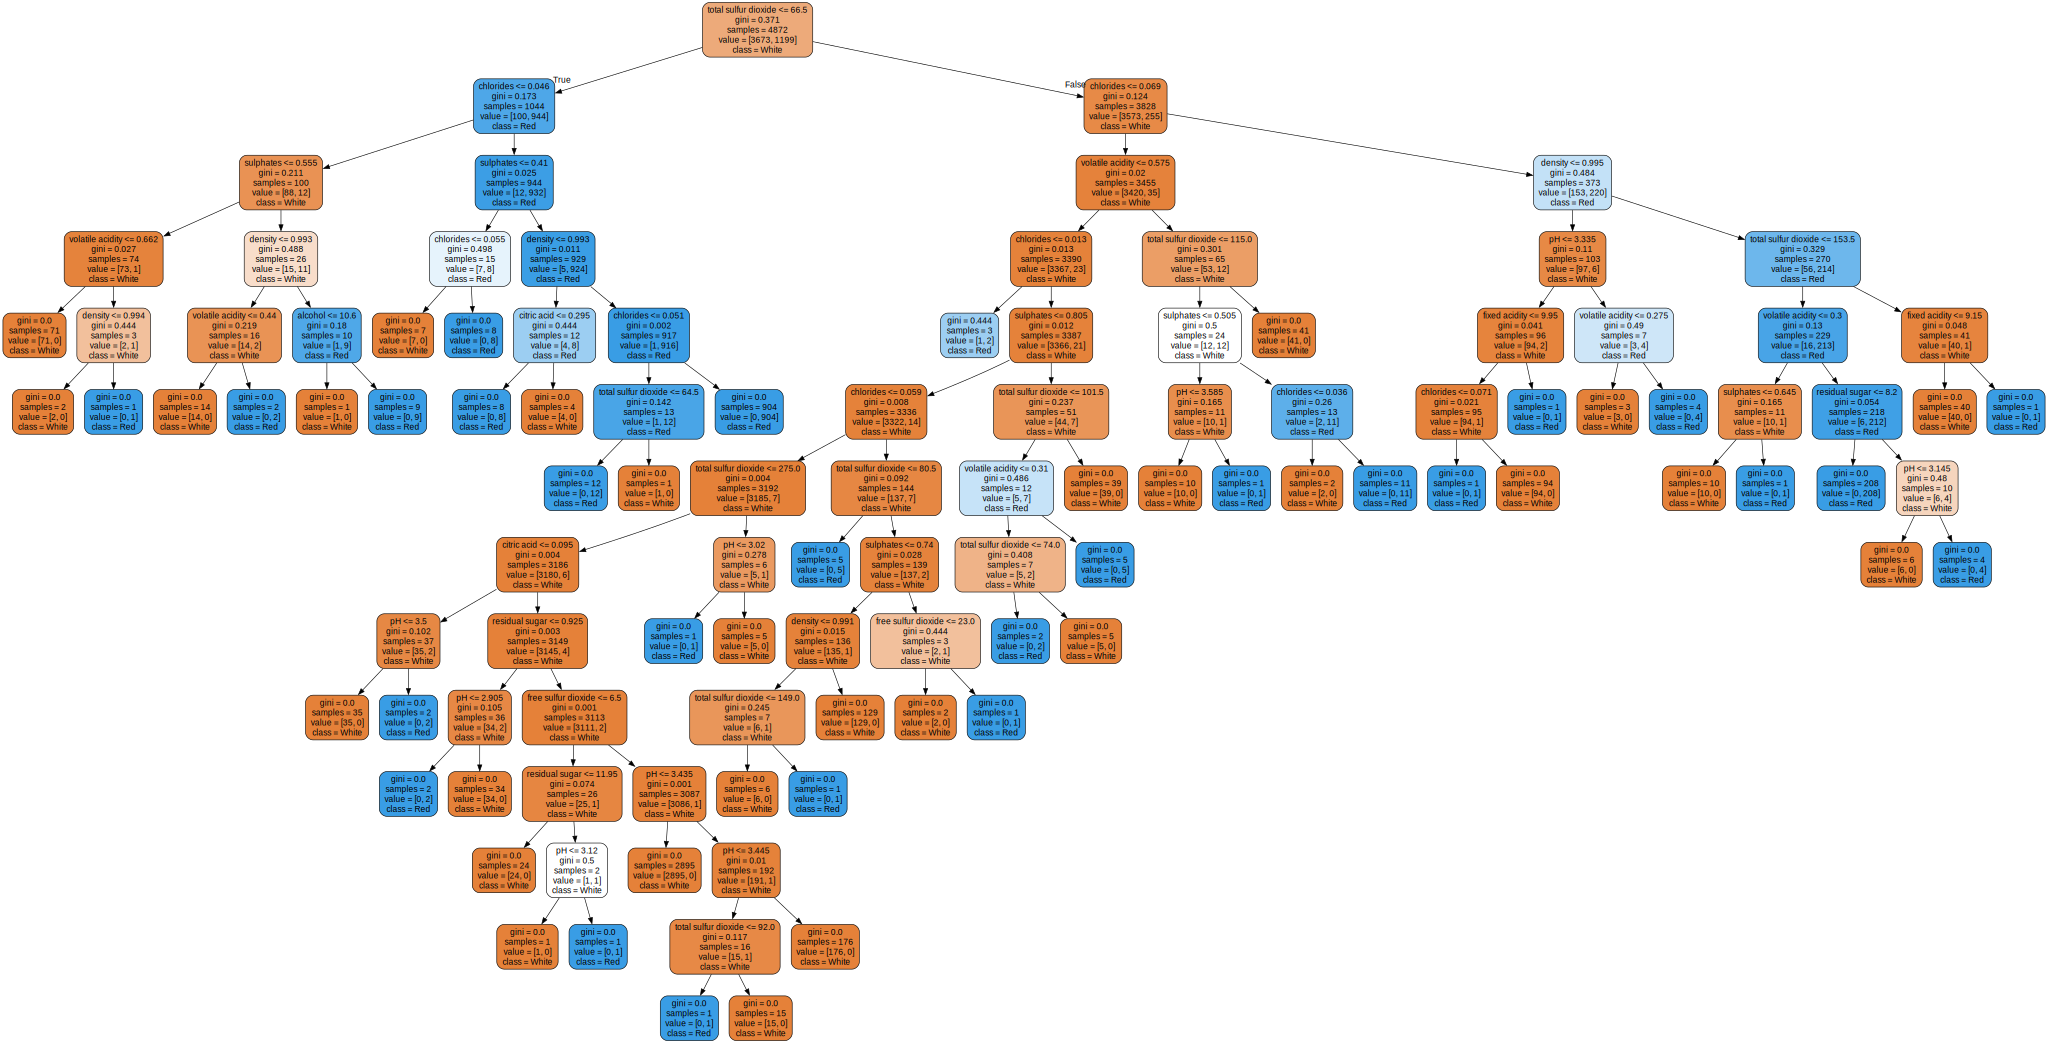

In [42]:
graph

In [43]:
# 각 feature(column)의 중요도(점수)
tree.feature_importances_

array([0.00215273, 0.0170795 , 0.00306507, 0.00443252, 0.20950343,
       0.00077958, 0.68631811, 0.05093937, 0.01158388, 0.01314941,
       0.00099639, 0.        ])

In [44]:
fi=pd.Series(tree.feature_importances_, index=X.columns)

In [45]:
fi

fixed acidity           0.002153
volatile acidity        0.017080
citric acid             0.003065
residual sugar          0.004433
chlorides               0.209503
free sulfur dioxide     0.000780
total sulfur dioxide    0.686318
density                 0.050939
pH                      0.011584
sulphates               0.013149
alcohol                 0.000996
quality                 0.000000
dtype: float64

In [46]:
fi.sort_values(ascending=False)

total sulfur dioxide    0.686318
chlorides               0.209503
density                 0.050939
volatile acidity        0.017080
sulphates               0.013149
pH                      0.011584
residual sugar          0.004433
citric acid             0.003065
fixed acidity           0.002153
alcohol                 0.000996
free sulfur dioxide     0.000780
quality                 0.000000
dtype: float64

<Axes: >

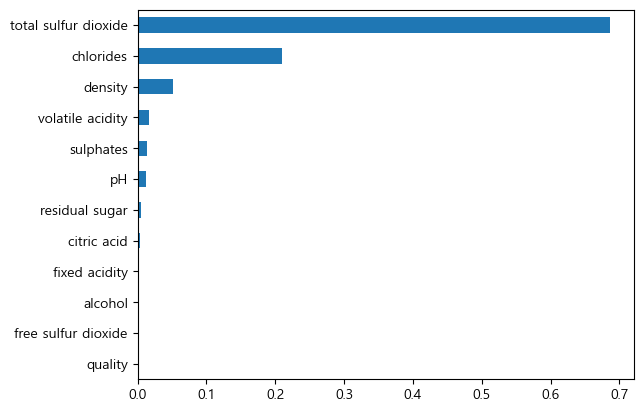

In [52]:
fi.sort_values().plot(kind='barh')

In [ ]:
### GridSearchCV
#max_depth
#max_leaf_nodes
#min_samples_leaf
#max_features


## 기준 : accuracy

## feature_importances_ 확인
## tree 구조 확인(graphviz)

In [60]:
X.shape

(6497, 12)

In [75]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
params= {
    "max_depth":range(1,14),
    "max_leaf_nodes":range(10,34),
    "min_samples_leaf":range(10,1000,10),
    "max_features":range(1,13)
}
# gs=RandomizedSearchCV(DecisionTreeClassifier(random_state=0),params,scoring='accuracy',cv=5,n_jobs=-1, n_iter=60)
gs=GridSearchCV(DecisionTreeClassifier(random_state=0),params,scoring='accuracy',cv=5,n_jobs=-1)
gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 14),
                         'max_features': range(1, 13),
                         'max_leaf_nodes': range(10, 34),
                         'min_samples_leaf': range(10, 1000, 10)},
             scoring='accuracy')

In [71]:
print("best score:",gs.best_score_)
print("best param:", gs.best_params_)

best score: 0.972292950034223
best param: {'min_samples_leaf': 50, 'max_leaf_nodes': 17, 'max_features': 7, 'max_depth': 8}


In [72]:
result=pd.DataFrame(gs.cv_results_)
result.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_max_leaf_nodes,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
22,0.012957,0.004328,0.002392,0.001196,50,17,7,8,"{'min_samples_leaf': 50, 'max_leaf_nodes': 17,...",0.960000,0.973333,0.969199,0.979466,0.979466,0.972293,0.007276,1
36,0.012500,0.011692,0.003125,0.006249,70,12,7,5,"{'min_samples_leaf': 70, 'max_leaf_nodes': 12,...",0.951795,0.958974,0.964066,0.971253,0.958932,0.961004,0.006444,2
53,0.006250,0.007654,0.006248,0.007652,140,28,8,7,"{'min_samples_leaf': 140, 'max_leaf_nodes': 28...",0.945641,0.968205,0.948665,0.957906,0.957906,0.955665,0.007960,3
52,0.003125,0.006251,0.006251,0.007656,140,24,11,2,"{'min_samples_leaf': 140, 'max_leaf_nodes': 24...",0.945641,0.946667,0.958932,0.957906,0.939425,0.949714,0.007534,4
5,0.003933,0.006052,0.003125,0.006250,120,16,5,3,"{'min_samples_leaf': 120, 'max_leaf_nodes': 16...",0.933333,0.946667,0.948665,0.941478,0.933265,0.940682,0.006468,5


In [73]:
#decision tree 속성이 보고 싶으면
best_model=gs.best_estimator_ # 제일 성능 좋은 모델을 따로 만들고
fi=pd.Series(best_model.feature_importances_,index=X.columns)
fi.sort_values(ascending=False)

total sulfur dioxide    0.708685
chlorides               0.140195
density                 0.088134
sulphates               0.045051
free sulfur dioxide     0.011514
fixed acidity           0.003781
volatile acidity        0.002484
citric acid             0.000079
pH                      0.000079
residual sugar          0.000000
alcohol                 0.000000
quality                 0.000000
dtype: float64

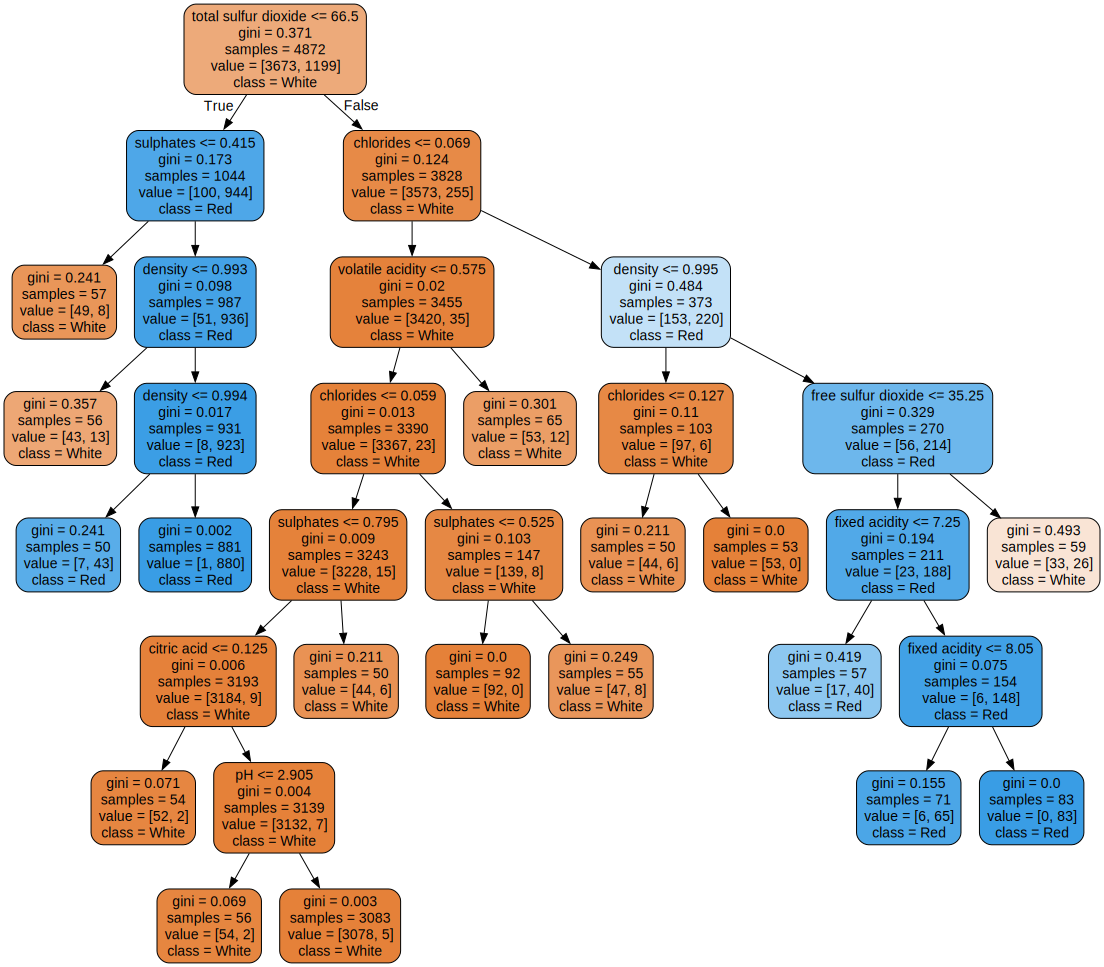

In [74]:
graph=Source(export_graphviz(best_model,feature_names=X.columns,class_names=['White','Red'],filled=True, rounded=True))
graph

# 회귀

In [78]:
%%writefile dataset.py
import pandas as pd
from sklearn.model_selection import train_test_split

def get_boston_dataset(path="data/boston_hosing.csv",test_size=0.25):
    df=pd.read_csv(path)
    X=df.drop(columns="MEDV")
    y=df['MEDV']
    dataset=train_test_split(X,y,test_size=test_size, random_state=0)
    return dataset

Writing dataset.py


In [79]:
from dataset import get_boston_dataset
X_train,X_test,y_train,y_test=get_boston_dataset()
X_train.shape,X_test.shape

((379, 13), (127, 13))

In [85]:
# 모델링
from sklearn.tree import DecisionTreeRegressor
tree_rg=DecisionTreeRegressor(max_depth=None, random_state=0)
tree_rg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

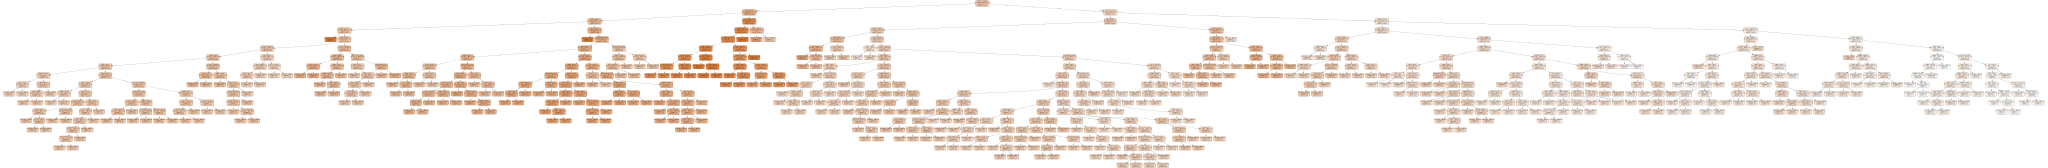

In [86]:
graph2=Source(export_graphviz(tree_rg, feature_names=X_train.columns,filled=True,rounded=True))
graph2

In [ ]:
---- 분기 위한 질문 ----
LSTAT <= 8.13
---- 현재 노드 상태 ----
squared_error=85.308 # value로 추론했을 때 오차(MSE)
samples=379
value=22.609 # 추론(pred) 할 값 -> sample들의 y의 평균

In [83]:
y_train.mean()

22.608707124010557

In [84]:
import numpy as np
np.square(y_train-y_train.mean()).mean()

85.30823553163789

In [87]:
from metrics import print_metrics_classification
print_metrics_classification(y_train,tree_rg.predict(X_train),'train set')
print_metrics_classification(y_test,tree_rg.predict(X_test),'test set')


==========train set==========


ValueError: continuous is not supported

In [90]:
fi2=pd.Series(tree_rg.feature_importances_, index=X_train.columns)
fi2.sort_values(ascending=False)

LSTAT      0.587391
RM         0.240399
DIS        0.049950
CRIM       0.032778
PTRATIO    0.031309
NOX        0.018697
TAX        0.013212
INDUS      0.007746
B          0.006542
AGE        0.006349
ZN         0.004035
RAD        0.001591
CHAS       0.000003
dtype: float64

# Ensemble(앙상블)
- 하나의 모델만을 학습시켜 사용하지 않고 여러 모델을 학습시켜 결합하는 방식으로 문제를 해결하는 방식
- 개별로 학습한 여러 모델을 조합해 과적합을 막고 일반화 성능을 향상시킬 수 있다.
- 개별 모델의 성능이 확보되지 않을 때 성능향상에 도움될 수 있다.

## 앙상블의 종류

### 1. 투표방식
- 여러개의 추정기(Estimator)가 낸 결과들을 투표를 통해 최종 결과를 내는 방식
- 종류
    1. Bagging - 같은 유형의 알고리즘들을 조합하되 각각 학습하는 데이터를 다르게 한다. 
        - Random Forest가 Bagging을 기반으로 한다.
    2. Voting - 서로 다른 종류의 알고리즘들을 결합한다.
    

### 2. 부스팅(Boosting)    
- 약한 학습기(Weak Learner)들을 결합해서 보다 정확하고 강력한 학습기(Strong Learner)를 만든다.
- 각 약한 학습기들은 순서대로 일을 하며 뒤의 학습기들은 앞의 학습기가 찾지 못한 부분을 추가적으로 찾는다.

# Random Forest (랜덤포레스트)
- Bagging 방식의 앙상블 모델
- Decision Tree를 기반으로 한다. 
- 다수의 Decision Tree를 사용해서 성능을 올린 앙상블 알고리즘의 하나
    - N개의 Decision Tree 생성하고 입력데이터를 각각 추론하게 한 뒤 가장 많이 나온 추론결과를 최종결과로 결정한다.
- 처리속도가 빠르며 성능도 높은 모델로 알려져 있다.  

> - Random: 학습할 때 Train dataset을 random하게 sampling한다.
> - Forest: 여러개의 (Decision) Tree 모델들을 앙상블한다.

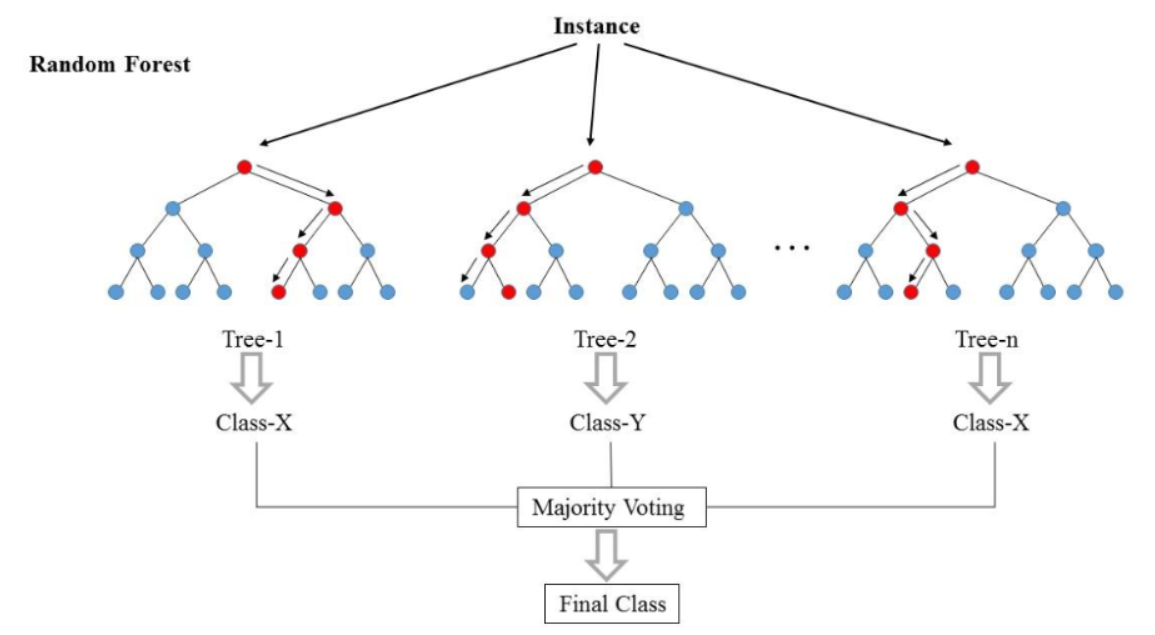

- **랜덤포레스트의 절차**
    - 객체 생성시 Decision Tree의 개수, Decision Tree에 대한 하이퍼파라미터들 등을 받아서 생성한다.
        - 모든 DecisionTree들은 같은 구조를 가지게 한다.
    - 학습시 모든 Decision Tree들이 서로 다른 데이터셋으로 학습하도록 Train dataset으로 부터 생성한 DecisionTree개수 만큼  sampling 한다.
        - **부트스트랩 샘플링**(중복을 허용하면서 랜덤하게 샘플링하는 방식)으로 데이터셋을 준비한다. (총데이터의 수는 원래 데이터셋과 동일 하지만 일부는 누락되고 일부는 중복된다.)
        - Sampling된 데이터셋들은  **전체 피처중 일부만** 랜덤하게 가지게 한다.
    - 각 트리별로 예측결과를 내고 분류의 경우 그 예측을 모아 다수결 투표로 클래스 결과를 낸다. 
    - 회귀의 경우는 예측 결과의 평균을 낸다.

- **주요 하이퍼파라미터**
    - n_estimators
        - DecisionTree 모델의 개수
        - 학습할 시간과 메모리가 허용하는 범위에서 클수록 좋다. 
    - max_features
        - 각 트리에서 선택할 feature의 개수
        - 클수록 각 트리간의 feature 차이가 크고 작을 수록 차이가 적게 나게 된다.
    - DecisionTree의 하이퍼파라미터들
        - Tree의 최대 깊이, 가지를 치기 위한 최소 샘플 수 등 Decision Tree에서 과적합을 막기 위한 파라미터들을 랜덤 포레스트에 적용할 수 있다.

### 와인 데이터셋 color 분류

##### train/test set 분리

##### RandomForestClassifier 생성, 학습, 검증

##### Feature importance